# 📺 Netflix Titles Dataset Exploration

This notebook explores Netflix’s public catalog data to understand trends in content type, release years, genres, and more.

We’ll use Python libraries like **Pandas** and **Matplotlib** to:
- Explore and clean the data
- Visualize insights
- Prepare for real-world data wrangling tasks

In [4]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔍 Step 1: Check for Missing Values

Let’s check which columns have missing data. This helps us decide what needs cleaning, filling, or dropping before we analyze further.

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 📊 Step 2: Initial Dataset Overview

Let’s take a deeper look at the dataset to understand:
- What types of data we’re working with
- Which columns are strings, numbers, or dates
- How many rows and columns we have

In [6]:
df.describe(include='all')  # View statistics for all columns

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## 🎬 Step 3: Count of Movies vs TV Shows

Let’s see how many titles on Netflix are listed as Movies versus TV Shows.  
We’ll start with a simple value count and then visualize it.

<Axes: title={'center': 'Movies vs TV Shows'}, xlabel='type'>

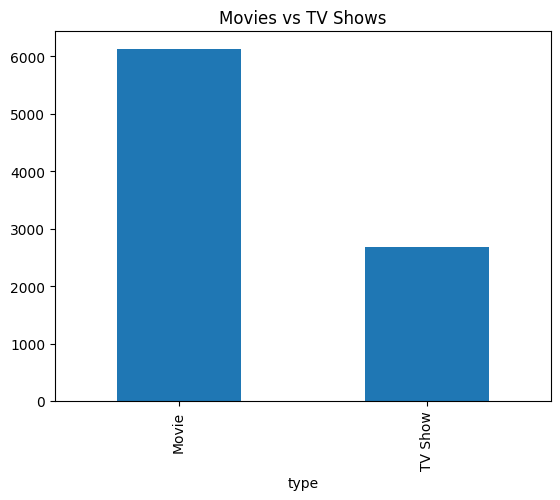

In [7]:
df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows')

## 📈 Step 4: Titles Released Over Time

We’ll analyze how the number of new titles released has changed by year.  
This helps us spot trends in Netflix’s content over time.

<Axes: title={'center': 'Content Released Over Time'}, xlabel='release_year'>

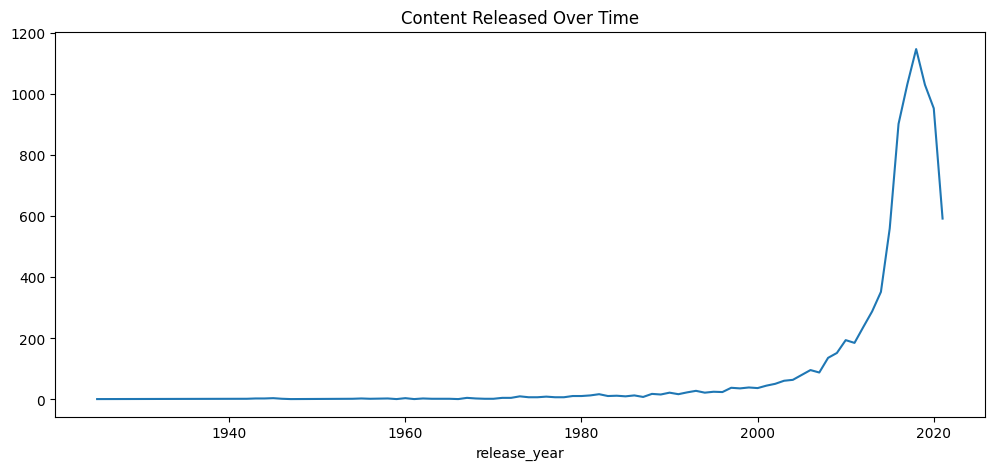

In [8]:
df['release_year'].value_counts().sort_index().plot(
    kind='line',
    figsize=(12, 5),
    title='Content Released Over Time'
)

## 🧹 Step 5: Clean the Dataset

Now that we know which columns have missing values, let’s clean up the dataset:
- Drop rows or columns with too many missing values
- Focus only on the most useful columns for analysis

In [9]:
# See which columns are most affected
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [10]:
# Drop unnecessary or hard-to-clean columns
df_clean = df.drop(columns=["director", "cast", "description"])

# Drop rows where 'country' or 'date_added' are missing
df_clean = df_clean.dropna(subset=["country", "date_added"])

# Check new shape
df_clean.shape

(7967, 9)

## 🎭 Step 6: Analyze Popular Genres

Let’s look at the most common genres across all Netflix titles.  
The `listed_in` column contains comma-separated genres (e.g., "Dramas, International Movies").  
We’ll split them and count which ones show up most.

In [11]:
# Split genre strings and flatten into a single list
from collections import Counter

all_genres = df_clean['listed_in'].dropna().str.split(', ')
flat_genre_list = [genre for sublist in all_genres for genre in sublist]

# Count the top genres
genre_counts = Counter(flat_genre_list)
top_genres = genre_counts.most_common(10)
top_genres

[('International Movies', 2543),
 ('Dramas', 2317),
 ('Comedies', 1580),
 ('International TV Shows', 1127),
 ('Action & Adventure', 817),
 ('Documentaries', 794),
 ('Independent Movies', 745),
 ('TV Dramas', 662),
 ('Romantic Movies', 588),
 ('Thrillers', 549)]

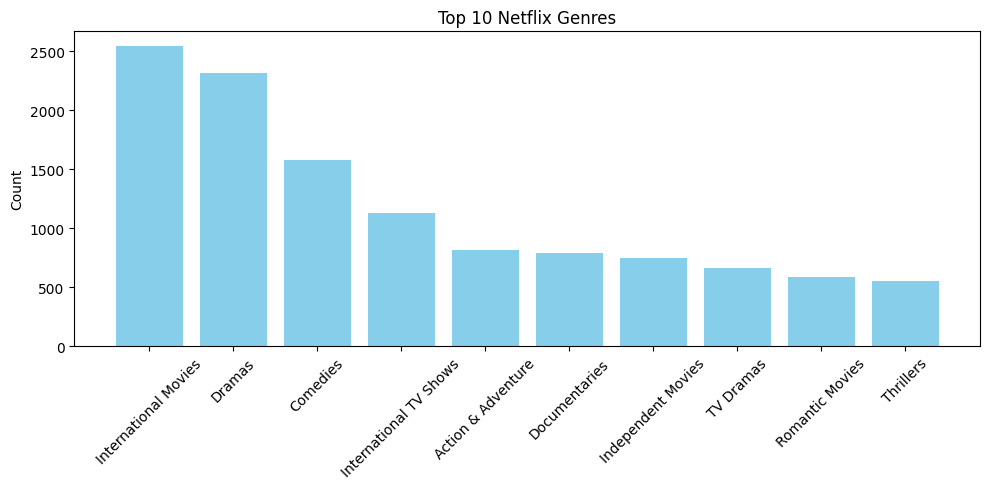

In [12]:
import matplotlib.pyplot as plt

# Turn top genres into separate lists
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color='skyblue')
plt.title("Top 10 Netflix Genres")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()